<a href="https://colab.research.google.com/github/CesarRoldan99/CEE88_Cesar/blob/main/LAB3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Libraries.
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix, classification_report
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:
# Loading the data.
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")
df
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [63]:
# Splitting for features

features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
            'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
            'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
            'cons.conf.idx', 'euribor3m', 'nr.employed']
df[features].head()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [7]:
# Splitting for labels

outcomes = ['y']
df[outcomes].head()

,y
0,no
1,no
2,no
3,no
4,no


In [8]:
# Drop Nans

print("Instances without dropping NaNs: ", len(df))
df = df.dropna(axis=0)
print("Instances with dropped NaNs: ", len(df))

Instances without dropping NaNs:  41188
Instances with dropped NaNs:  41188


In [9]:
# Using Label Encoder on the label

x_df = df[features].copy()
y_df = df[outcomes].copy()

y_df = y_df.apply(LabelEncoder().fit_transform)
print(y_df)


       y
0      0
1      0
2      0
3      0
4      0
...   ..
41183  1
41184  0
41185  0
41186  1
41187  0

[41188 rows x 1 columns]


In [56]:
# Convert to dummies.

df_dummies = pd.get_dummies(x_df)
df_dummies=df_dummies.drop(columns="duration")
df_dummies.head()
X = df_dummies.values
Y = y_df.values
Y = Y.T[0]
print(X)
print(Y)

countY=0
countN=0
for i in Y:
    if i == 1:
        countY+=1
    else:
        countN+=1


print(countY)
print(countY/len(Y))

[[ 56.   1. 999. ...   0.   1.   0.]
 [ 57.   1. 999. ...   0.   1.   0.]
 [ 37.   1. 999. ...   0.   1.   0.]
 ...
 [ 56.   2. 999. ...   0.   1.   0.]
 [ 44.   1. 999. ...   0.   1.   0.]
 [ 74.   3. 999. ...   1.   0.   0.]]
[0 0 0 ... 0 1 0]
4640
0.11265417111780131


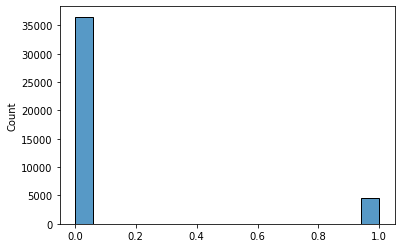

In [11]:
# Plotting the histogram for labels

sns_plot = sns.histplot(Y, kde=False)

In [12]:
# Using DummyClassifier

dummy_clf = DummyClassifier(strategy = "stratified")
dummy_clf.fit(X, Y)
print("Dummy F1: %.2f"  % f1(Y, dummy_clf.predict(X)))


Dummy F1: 0.11


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, Y, test_size = 0.2, random_state = 50)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[ 32.   2. 999. ...   0.   1.   0.]
 [ 31.   1. 999. ...   0.   1.   0.]
 [ 28.   2. 999. ...   0.   1.   0.]
 ...
 [ 39.   1. 999. ...   0.   1.   0.]
 [ 60.   1. 999. ...   0.   1.   0.]
 [ 53.   2. 999. ...   0.   1.   0.]]
[[ 40.   2. 999. ...   0.   1.   0.]
 [ 42.   6. 999. ...   0.   1.   0.]
 [ 35.   1. 999. ...   0.   1.   0.]
 ...
 [ 31.   3. 999. ...   0.   1.   0.]
 [ 35.   1. 999. ...   0.   1.   0.]
 [ 31.   2. 999. ...   0.   1.   0.]]
[1 0 0 ... 0 0 1]
[0 0 0 ... 0 0 0]


In [65]:
# Using DummyClassifier

dummy_clf = DummyClassifier(strategy = "stratified")
scores = cross_val_score(dummy_clf, X_train, y_train , cv=10, scoring=make_scorer(f1))
print("F1: %.2f +/- %.2f" % (scores.mean(),scores.std()))

F1: 0.11 +/- 0.02


In [68]:
# Random forest classifier
clf = RandomForestClassifier(n_estimators=250, max_depth=6)
scores = cross_val_score(clf, X_train, y_train , cv=10, scoring=make_scorer(f1))
print("F1: %.2f +/- %.2f" % (scores.mean(),scores.std()))


F1: 0.29 +/- 0.02


In [15]:
# Using GridSearchCV
clf_grid = RandomForestClassifier()
parameters = [{'n_estimators': [100,1000], 'max_depth': [3,4,5]}]
grid_search = GridSearchCV(estimator= clf_grid, param_grid = parameters, scoring = 'f1', cv = 10)
grid_search = grid_search.fit(X_train, y_train)


In [16]:
f1_score = grid_search.best_score_

print("The f1 for predicting test data for our model is : {0}% ".format(f1_score))

The f1 for predicting test data for our model is : 0.2831421454850697% 


In [18]:
best_params= grid_search.best_params_
print("The f1 for predicting test data for our model is :  ", best_params)

The f1 for predicting test data for our model is :   {'max_depth': 5, 'n_estimators': 100}


F1: 0.29 +/- 0.02
Feature ranking:
1. euribor3m (0.153529)
2. nr.employed (0.151882)
3. pdays (0.107120)
4. poutcome_success (0.088205)
5. emp.var.rate (0.083278)
6. cons.conf.idx (0.076004)
7. cons.price.idx (0.053280)
8. age (0.031433)
9. previous (0.025479)
10. poutcome_nonexistent (0.020443)


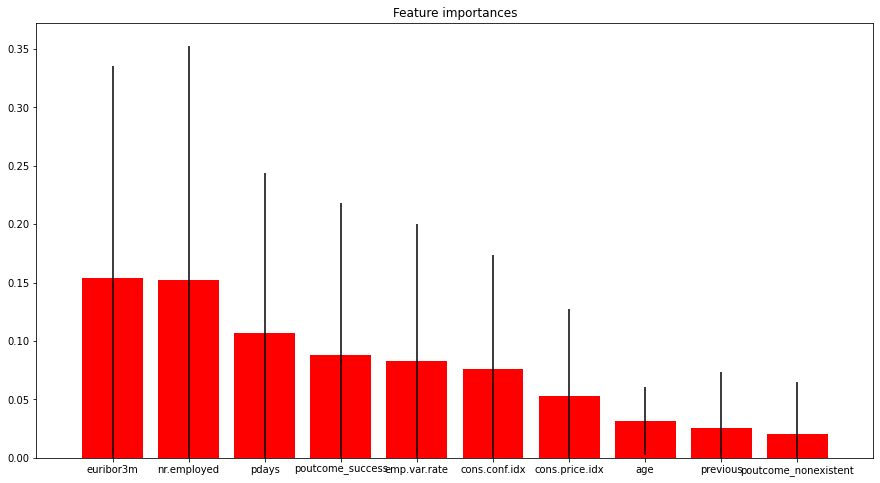

In [73]:
# Best feature.
clf = RandomForestClassifier(n_estimators=400, max_depth=8, random_state=60)
clf.fit(X_train, y_train)
print("F1: %.2f +/- %.2f" % (scores.mean(),scores.std()))

importances = clf.feature_importances_
std = np.std([ tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
indices = indices[: 10]

# Print the feature ranking
print("Feature ranking:")

for f in range(0,10):
    print("%d. %s (%f)" % (f+1, df_dummies.columns[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(10), np.array(df_dummies.columns)[indices])
plt.xlim([-1, 10])
plt.ylim([0, None])


fig.set_size_inches(15, 8)

In [50]:
# Generalization error
clf_grid.fit(X_train,y_train)
print("Generalization error f1= : %.2f" % f1(y_test, clf_grid.predict(X_test)) )

Generalization error f1= : 0.38


In [72]:

clf = RandomForestClassifier(n_estimators=400, max_depth=8, random_state=60)
clf.fit(X_train,y_train)
print("Generalization error f1= : %.2f" % f1(y_test, clf.predict(X_test)) )

Generalization error f1= : 0.34
